<a href="https://colab.research.google.com/github/sumit33/Sign_Language_Detection/blob/main/Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/sign_mnist_train.csv')
test = pd.read_csv('gdrive/My Drive/Colab Notebooks/Dataset/sign_mnist_test.csv')

In [17]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [18]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [19]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

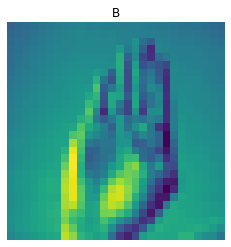

In [20]:
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

In [22]:
# Prepare the training and testing dataset 
from keras.utils import np_utils

# normalizing the data to help with the training
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

# one-hot encoding using keras' numpy-related utilities
n_classes = 25

y_train = np_utils.to_categorical(y_train, n_classes)
#y_validate = np_utils.to_categorical(y_validate, n_classes)

In [23]:
X_train.shape, y_train.shape 

((27455, 784), (27455, 25))

In [24]:
X_test.shape, y_test.shape 

((7172, 784), (7172,))

In [25]:
class_names[0]

'A'

3
6
2
2
13
16
8
22
3
3
18
10
16
22
20
16
17
13
13
19
18
21
16
23
3


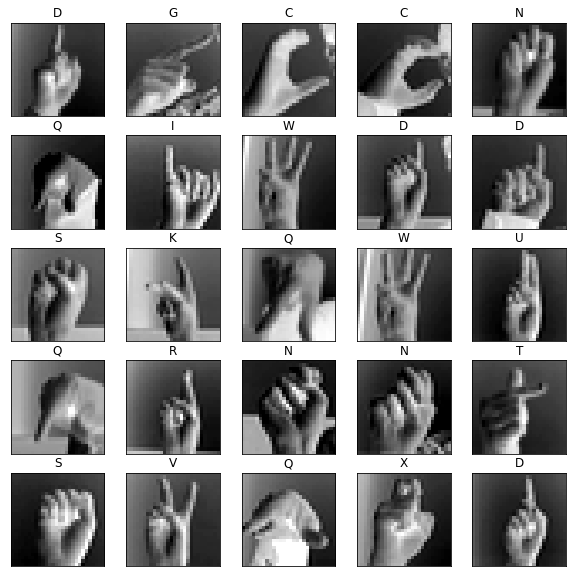

In [26]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    
    for j in range(len(y_train[i])):
      
      if(y_train[i,j]==1):
        label_index = j
        break;
    
    print(label_index)
    plt.title(class_names[label_index])
plt.show()

In [27]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [28]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964, 25)


In [29]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964, 25)
(5491, 28, 28, 1)


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

def get_model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer
  model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28,1)))

  # convolutional layer
  model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  # flatten output of conv
  model.add(Flatten())

  # hidden layer
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(250, activation='relu'))
  model.add(Dropout(0.3))
  # output layer
  model.add(Dense(25, activation='softmax'))

  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model

In [31]:
model = get_model()
model.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=(X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 141s 3s/step - loss: 3.1243 - accuracy: 0.0677 - val_loss: 1.6255 - val_accuracy: 0.5323
Epoch 2/50
43/43 [==============================] - 125s 3s/step - loss: 1.4718 - accuracy: 0.5236 - val_loss: 0.3831 - val_accuracy: 0.8885
Epoch 3/50
43/43 [==============================] - 126s 3s/step - loss: 0.5122 - accuracy: 0.8229 - val_loss: 0.0746 - val_accuracy: 0.9840
Epoch 4/50
43/43 [==============================] - 126s 3s/step - loss: 0.2116 - accuracy: 0.9279 - val_loss: 0.0149 - val_accuracy: 0.9989
Epoch 5/50
43/43 [==============================] - 126s 3s/step - loss: 0.0951 - accuracy: 0.9692 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/50
43/43 [==============================] - 126s 3s/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/50
43/43 [==============================] - 128s 3s/step - loss: 0.0376 - accuracy: 0.9877 - val_loss: 6.4479e-04 - val_accuracy: 1.0000
Epoch 8/5

In [32]:
n_classes = 25

y_test = np_utils.to_categorical(y_test, n_classes)

In [33]:
X_test.shape, y_test.shape

((7172, 28, 28, 1), (7172, 25))

In [34]:
eval = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

In [35]:
predicted_classes = model.predict_classes(X_test)
print(predicted_classes[0])
print(y_test[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
